In [5]:
%pip install -q ipywidgets matplotlib

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import math
import ipywidgets as widgets

In [7]:
plt.style.use('_mpl-gallery')
FLOOR_MARGIN = 1
CEILING_MARGIN = 1
GRAPH_MARGIN = 1
# make data
def graphFunctions (amp1,wavelength1,offset1,amp2,wavelength2,offset2):
    x = np.linspace(0, 10, int(200/min(wavelength1,wavelength2)))
    y1 = FLOOR_MARGIN + amp1 + amp1 * np.sin((2 * math.pi * (x-offset1)/wavelength1))
    y2 = FLOOR_MARGIN + amp1 * 2 + GRAPH_MARGIN + amp2 + amp2 * np.sin((2 * math.pi * (x-offset2)/wavelength2))
    y3 = FLOOR_MARGIN + amp1 * 3 + GRAPH_MARGIN * 2 + amp2 * 3 + amp1 * np.sin((2 * math.pi * (x-offset1)/wavelength1)) + amp2 * np.sin((2 * math.pi * (x-offset2)/wavelength2));
    # plot
    yMax = FLOOR_MARGIN+amp1*4+amp2*4+GRAPH_MARGIN*2+CEILING_MARGIN
    fig, ax = plt.subplots(figsize=(5,yMax/8))
    ax.plot(x, y1, linewidth=2.0)
    ax.plot(x, y2, linewidth=2.0)
    ax.plot(x, y3, linewidth=2.0)
    #xlim and ylim set the bounds; xticks and yticks set where the lines appear
    ax.set(xlim=(0, 1), xticks=np.arange(1, 8),
           ylim=(0, yMax), yticks=np.arange(1, yMax))

    plt.show()


Edit the variables to generate graphs and see how they look when combined.

In [4]:
sliderNames = ["Amplitude", "Wavelength", "Offset"]
sliders = [];
for i in range(2):
    for sliderName in sliderNames:
        textBox = None
        slider = None
        if sliderName == "Amplitude":
            textBox = widgets.IntText()
            slider = widgets.IntSlider()
            slider.min = 0
            slider.max = 5
            slider.value = 1
        elif sliderName == "Wavelength":
            textBox = widgets.FloatText()
            slider = widgets.FloatLogSlider()
            slider.min = -2
            slider.max = 2
            slider.value = 1
        elif sliderName == "Offset":
            textBox = widgets.FloatText()
            slider = widgets.FloatSlider()
            slider.min = 0
            slider.max = 1
            slider.step = 0.1
            slider.value = 0 if i==0 else 0.2
        widgets.jslink((slider, 'value'), (textBox, 'value')) #Link together sliders and text boxes so they can be used together
        textBox.description = sliderName +" "+str(i+1)
        display(textBox,slider)
        sliders.append(slider)
# Must use interactive_output in order to ensure it does not automatically display the sliders by itself
resultPlot = widgets.interactive_output(graphFunctions,{"amp1":sliders[0],"wavelength1":sliders[1],"offset1":sliders[2],"amp2":sliders[3],"wavelength2":sliders[4],"offset2":sliders[5]})
resultPlot

IntText(value=0, description='Amplitude 1')

IntSlider(value=1, max=5)

FloatText(value=0.0, description='Wavelength 1')

FloatLogSlider(value=1.0, max=2.0, min=-2.0)

FloatText(value=0.0, description='Offset 1')

FloatSlider(value=0.0, max=1.0)

IntText(value=0, description='Amplitude 2')

IntSlider(value=1, max=5)

FloatText(value=0.0, description='Wavelength 2')

FloatLogSlider(value=1.0, max=2.0, min=-2.0)

FloatText(value=0.0, description='Offset 2')

FloatSlider(value=0.2, max=1.0)

Output()

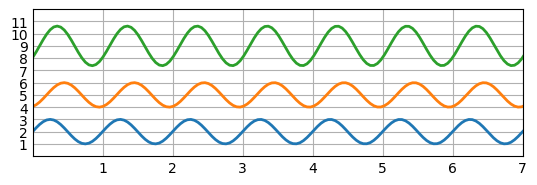

In [9]:
amp1 = 1
wavelength1 = 1
offset1 = 0;
amp2 = 1
wavelength2 = 1
offset2 = 0.2
graphFunctions(amp1,wavelength1,offset1,amp2,wavelength2,offset2)